----
## **<font color="crimson"> Solo cambiar base de temperatrua ERA5, ya está ok lo demás </font>**

## **<font color="crimson"> No está el cuadrante sur </font>**

In [1]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install toolz

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as patches
import cftime

### **<font color="Purple"> Datos de HadGEM3 </font>**

### **<font color="olive"> Temperatura </font>**

In [7]:
tas_file = 'datasetsok/tasday79.nc'

In [8]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']
tas

<xarray.DataArray 'tas' (time: 12960, lat: 144, lon: 192)> Size: 1GB
[358318080 values with dtype=float32]
Coordinates:
  * time     (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...

In [9]:
tas_inviernoshg = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [10]:
file_anomtas = 'datasetsok/anomalias_day_tasHG.nc'
anom_tas = xr.open_dataset(file_anomtas)
anomaliasday_tas = anom_tas['tas']

### **<font color="olive"> Viento </font>**

In [11]:
file_uHG = 'datasetsok/uday_250hpa_HG_1979_2014.nc'

In [12]:
u_ds=xr.open_dataset(file_uHG)
uHG=u_ds['ua']  

In [13]:
u_inviernosHG = uHG.sel(time=uHG ['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [14]:
file_anomua = 'datasetsok/anomalias_day_uHG.nc'
anom_ua = xr.open_dataset(file_anomua)
anomaliasday_ua = anom_ua['ua']
anomdayua = anomaliasday_ua.sel(time=anomaliasday_ua['time.month'].isin([12, 1, 2]))

### **<font color="Purple"> Datos de ERA-5 </font>**

### **<font color="olive"> Temperatura</font>**

In [15]:
filet2m_era5 = 'datasetsok/t2mC_1979-2024large.nc'

In [16]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [17]:
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [18]:
file_anomt2m = 'datasetsok/anomalias_day_t2mE5.nc'
anom_t2m = xr.open_dataset(file_anomt2m)
anomaliasday_t2m = anom_t2m['t2m']

### **<font color="olive"> Viento </font>**

In [19]:
fileu_era5 = 'datasetsok/u_daily_500_200_1979-2024.nc'

In [20]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [21]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(pressure_level=200)

In [22]:
u_inviernosE5 = u200E5.sel(time=u200E5['time.month'].isin([12, 1, 2]))

##### Climatología diaria

In [23]:
file_anomu = 'datasetsok/anomalias_day_uE5.nc'
anom_u = xr.open_dataset(file_anomu)
anomaliasday_u = anom_u['u']
anomdayu= anomaliasday_u.sel(time=anomaliasday_u['time.month'].isin([12, 1, 2]))

### **<font color="olive"> CAOs de HadGEM </font>**

In [24]:
# A invierno le vamos a poner las fechas del df 

In [25]:
caosHGdf = pd.read_csv('datasetsok/fechasCAOs_HG.csv')

In [26]:
indicescaoHG = caosHGdf['indice']
fechascaoHG = caosHGdf['fecha']
# fechascaoHG

##### **<font color="olive"> Temperatura durante CAO </font>**

In [27]:
t_caosHG = tas_inviernoshg.isel(time=indicescaoHG) #así funciona pero necesito comprobar que los indices estan bien

In [29]:
TmeanCAO_HG = t_caosHG.mean('time')

In [30]:
TanomaliaHG = TmeanCAO_HG - tas_inviernoshg

##### **<font color="olive"> Viento durante CAO </font>**

In [31]:
u_caosHG = u_inviernosHG.isel(time=indicescaoHG) 

In [32]:
VmeanCAO_HG = u_caosHG.mean('time')

In [33]:
VanomaliaHG = VmeanCAO_HG - u_inviernosHG #CHECAR QUE ESTE BIEN

### **<font color="olive"> CAOs de ERA5</font>**

In [34]:
# A invierno le vamos a poner las fechas del df 

In [35]:
caosE5df = pd.read_csv('datasetsok/fechasCAO_E5.csv')

In [36]:
indicescaoE5 = caosE5df['indice']
fechascaoE5 = caosE5df['fecha']
# fechascaoE5

##### **<font color="olive"> Temperatura durante CAO </font>**

In [37]:
t_caosE5 = t2m_inviernos.isel(time=indicescaoE5) #así funciona pero necesito comprobar que los indices estan bien

In [38]:
TmeanCAO_E5 = t_caosE5.mean('time')

In [39]:
TanomaliaE5 = TmeanCAO_E5 - t2m_inviernos

##### **<font color="olive"> Viento durante CAO </font>**

In [40]:
u_caosE5 = u_inviernosE5.isel(time=indicescaoE5) 

In [41]:
VmeanCAO_E5 = u_caosE5.mean('time')

In [42]:
VanomaliaE5  = VmeanCAO_E5 - u_inviernosE5 #CHECAR QUE ESTE BIEN este es un método

DETREND

In [43]:
def detrend_dataarray_preserve_mean(da, dim='time'):
    """
    Remove the linear trend (slope) along the specified dimension from an xarray DataArray,
    while preserving the original mean of the data.

    Parameters:
      da (xr.DataArray): The input data array.
      dim (str): The dimension along which to detrend (default is 'time').

    Returns:
      xr.DataArray: The detrended data array with the original mean preserved.
    """
    # Convert time coordinate to numeric values.
    if isinstance(da[dim].values[0], cftime.datetime):
        try:
            calendar = da[dim].values[0].calendar
        except AttributeError:
            calendar = 'standard'
        units = "days since 2000-01-01"
        time_numeric_values = [cftime.date2num(t, units, calendar) for t in da[dim].values]
        time_numeric = xr.DataArray(time_numeric_values, dims=dim, coords={dim: da[dim]})
    else:
        time_numeric = xr.DataArray(
            da[dim].values.astype('float64'),
            dims=dim,
            coords={dim: da[dim]}
        )
    
    def detrend_1d_preserve_mean(y, x):
        # Fit a linear trend
        p = np.polyfit(x, y, 1)
        slope, intercept = p
        # Subtract only the slope * (x - mean(x)) to preserve the overall mean.
        return y - slope * (x - np.mean(x))
    
    detrended = xr.apply_ufunc(
        detrend_1d_preserve_mean,
        da,
        time_numeric,
        input_core_dims=[[dim], [dim]],
        output_core_dims=[[dim]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[da.dtype]
    )
    
    return detrended

# Example usage:
# da_detrended = detrend_dataarray_preserve_mean(regionHG, dim='time')


In [44]:
anomday_detrendHG = detrend_dataarray_preserve_mean(anomaliasday_tas, dim='time') #aquí les está quitando la tendencia de CC a las anomalías
anomday_detrend_tasDJF=anomday_detrendHG.sel(time=anomday_detrendHG['time.month'].isin([12, 1, 2]))

In [45]:
anomday_detrendE5 = detrend_dataarray_preserve_mean(anomaliasday_t2m, dim='time') #aquí les está quitando la tendencia de CC a las anomalías
anomday_detrend_t2mDJF=anomday_detrendE5.sel(time=anomday_detrendE5['time.month'].isin([12, 1, 2]))

##### **<font color="olive"> MÉTODO 1. Ciclo anual temperatura </font>**

In [46]:
# HADGEM --------------
tempsHGday = anomday_detrend_tasDJF.isel(time=indicescaoHG)
tempsHGday = tempsHGday.mean(dim='time')
# fechascaoE5
# ERA ---------------------
tempsE5day = anomday_detrend_t2mDJF.isel(time=indicescaoE5)
tempsE5day = tempsE5day.mean(dim='time')
# fechascaoE5

##### **<font color="olive"> MÉTODO 2. Estacionalidad temperatura </font>**

In [47]:
# HADGEM --------------
TmeanCAO_HG
TanomaliaHG = TanomaliaHG.mean(dim='time')


# ERA ---------------------
TmeanCAO_E5
TanomaliaE5 = TanomaliaE5.mean(dim='time')

##### **<font color="olive"> MÉTODO 1. Ciclo anual viento </font>**

In [48]:
# HADGEM --------------
usHGday = anomdayua.isel(time=indicescaoHG) 
usHGday = usHGday.mean(dim='time')
# ERA ---------------------
usE5day = anomdayu.isel(time=indicescaoE5) 
usE5day = usE5day.mean(dim='time')
# usE5day
# fechascaoE5

##### **<font color="olive"> MÉTODO 2. Estacionalidad viento </font>**

In [49]:
# HADGEM --------------
VmeanCAO_HG
VanomaliaHG =  VanomaliaHG.mean(dim='time')  

# ERA ---------------------
VmeanCAO_E5
VanomaliaE5 = VanomaliaE5.mean(dim='time') 

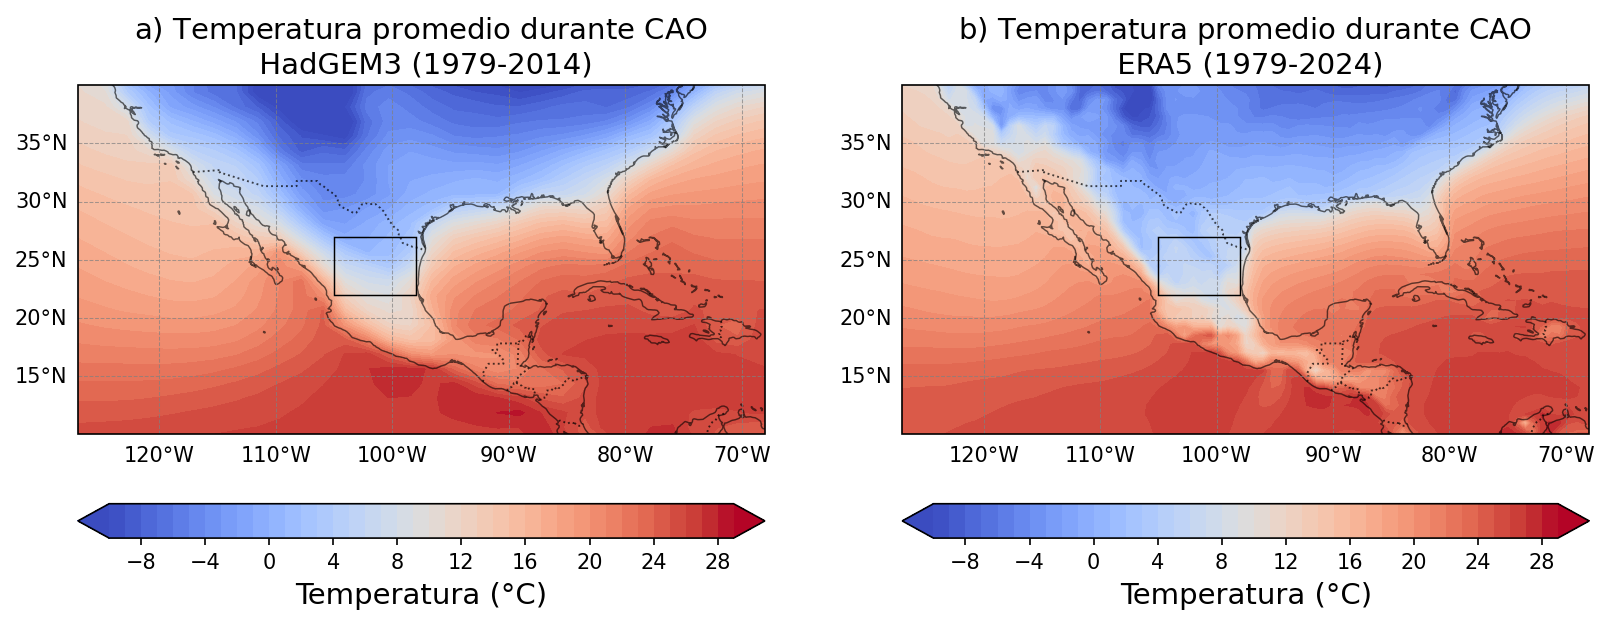

In [50]:
# Usar constrained_layout en lugar de tight_layout
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})

# Subplot 1 - HadGEM3
ax1 = axes[0]
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs1 = ax1.contourf(TmeanCAO_HG.lon, TmeanCAO_HG.lat, TmeanCAO_HG, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
rect = patches.Rectangle((255, 22), 262-255, 27-22, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax1.add_patch(rect)
gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl1.top_labels = gl1.right_labels = False
ax1.tick_params(labelsize=12)
ax1.set_title('a$)$ Temperatura promedio durante CAO \n HadGEM3 (1979-2014)', fontsize=14)

# Subplot 2 - ERA5
ax2 = axes[1]
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs2 = ax2.contourf(TmeanCAO_E5.longitude, TmeanCAO_E5.latitude, TmeanCAO_E5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
rect = patches.Rectangle((255, 22), 262-255, 27-22, 
                         linewidth=0.7, edgecolor='black', facecolor='none', 
                         transform=ccrs.PlateCarree(), zorder=10)
ax2.add_patch(rect)
gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl2.top_labels = gl2.right_labels = False
ax2.tick_params(labelsize=12) 
ax2.set_title('b$)$ Temperatura promedio durante CAO \n ERA5 (1979-2024)', fontsize=14)

# Colorbar único
cbar = fig.colorbar(cs2, ax=ax1, orientation='horizontal', fraction=0.09, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=14)
cbar = fig.colorbar(cs1, ax=ax2, orientation='horizontal', fraction=0.09, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=14)

plt.savefig("figsok/TmeanCAO.png", bbox_inches='tight')

plt.show()


In [51]:
# fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# plt.subplots_adjust(wspace=0.2, hspace=0.35)
# axs = axs.flatten()

# # MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[0]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(TmeanCAO_HG.lon, TmeanCAO_HG.lat, TmeanCAO_HG, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect = patches.Rectangle((255, 22), 262-255, 27-22, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect)
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('a$)$ HadGEM3 cuadrante norte', fontsize=12)

# # MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[1]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(TmeanCAO_E5.longitude, TmeanCAO_E5.latitude, TmeanCAO_E5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect2 = patches.Rectangle((255, 22), 262-255, 27-22, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect2)
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('b$)$ ERA5 cuadrante norte', fontsize=12)

# # MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
# ax = axs[2]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(tempsHGday.lon, tempsHGday.lat, tempsHGday, levels=np.arange(-10,30,1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect3 = patches.Rectangle((255, 17), 262-255, 22-17, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect3)
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('c$)$ HadGEM3 cuadrante sur', fontsize=12)

# # MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
# ax = axs[3]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(tempsE5day.longitude, tempsE5day.latitude, tempsE5day, levels=np.arange(-10,30,1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# rect4 = patches.Rectangle((255, 17), 262-255, 22-17, 
#                          linewidth=0.7, edgecolor='black', facecolor='none', 
#                          transform=ccrs.PlateCarree(), zorder=10)
# ax.add_patch(rect4)

# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('d$)$ ERA5 cuadrante sur', fontsize=12)

# plt.tight_layout()
# plt.subplots_adjust(top=.95)
# # plt.suptitle('Temperatura durante eventos CAO en dos cuadrantes',fontsize=14,color="k",fontstyle='italic',fontweight='bold');


# plt.savefig('figs/6_TmeanCAO_NyS')

----
## **<font color="crimson"> Ya ok </font>**

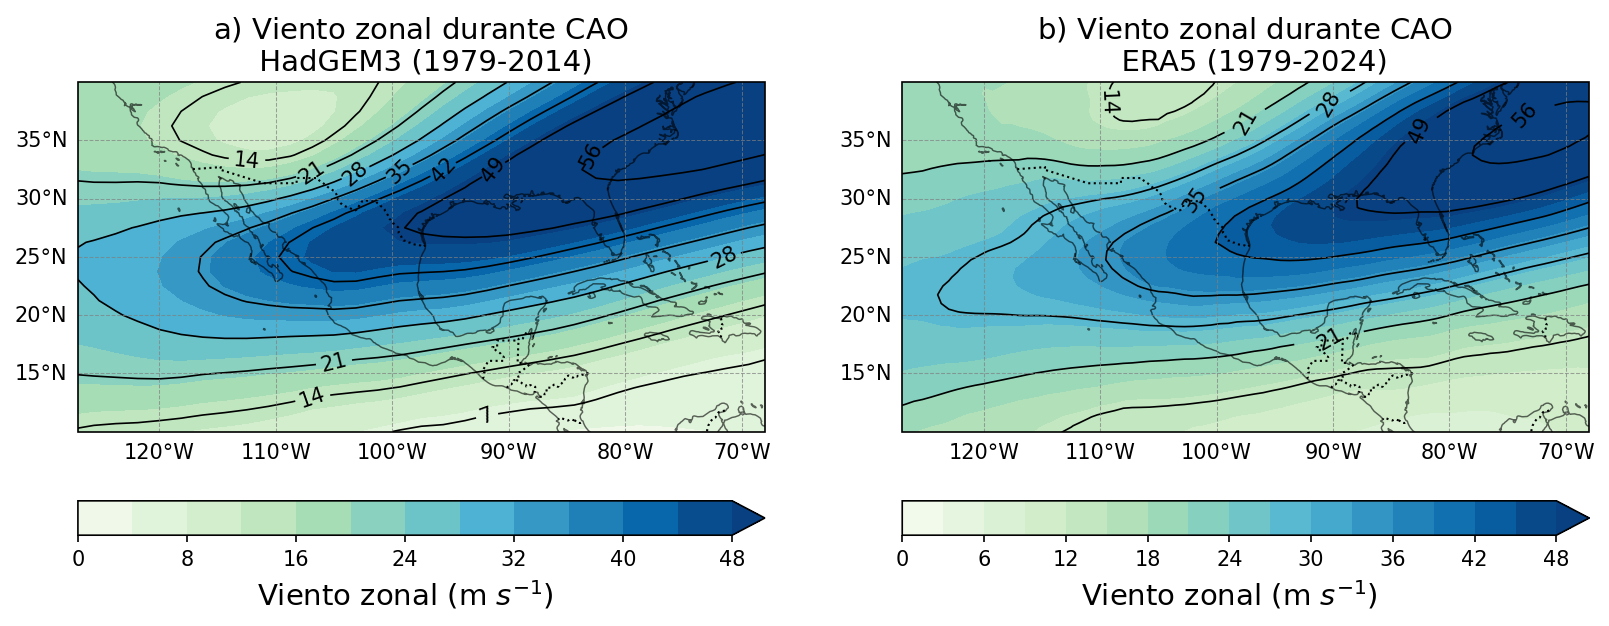

In [52]:
# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})

# Subplot 1
# ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1 = axes[0]
ax1.coastlines(linewidth=0.7, alpha=0.6)
cs = ax1.contourf(VmeanCAO_HG.lon, VmeanCAO_HG.lat, VmeanCAO_HG, levels=np.arange(0, 50, 4), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax1.contour(VmeanCAO_HG.lon, VmeanCAO_HG.lat, VmeanCAO_HG, levels=np.arange(0, 60, 7), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09, pad=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
ax1.set_title('a$)$ Viento zonal durante CAO \n HadGEM3 (1979-2014)', fontsize=14)

# Subplot 2
ax2 = axes[1]
ax2.coastlines(linewidth=0.7, alpha=0.6)
cs = ax2.contourf(VmeanCAO_E5.longitude, VmeanCAO_E5.latitude, VmeanCAO_E5, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax2.contour(VmeanCAO_E5.longitude, VmeanCAO_E5.latitude, VmeanCAO_E5, levels=np.arange(0, 60, 7), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09,pad=0.1, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
ax2.set_title('b$)$ Viento zonal durante CAO \n  ERA5 (1979-2024)', fontsize=14)

plt.savefig("figsok/8_VmeanCAO.png", bbox_inches='tight')


----
## **<font color="crimson"> Ya ok </font>**

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatra superficial en CAOS con dos métodos </i> </h1>

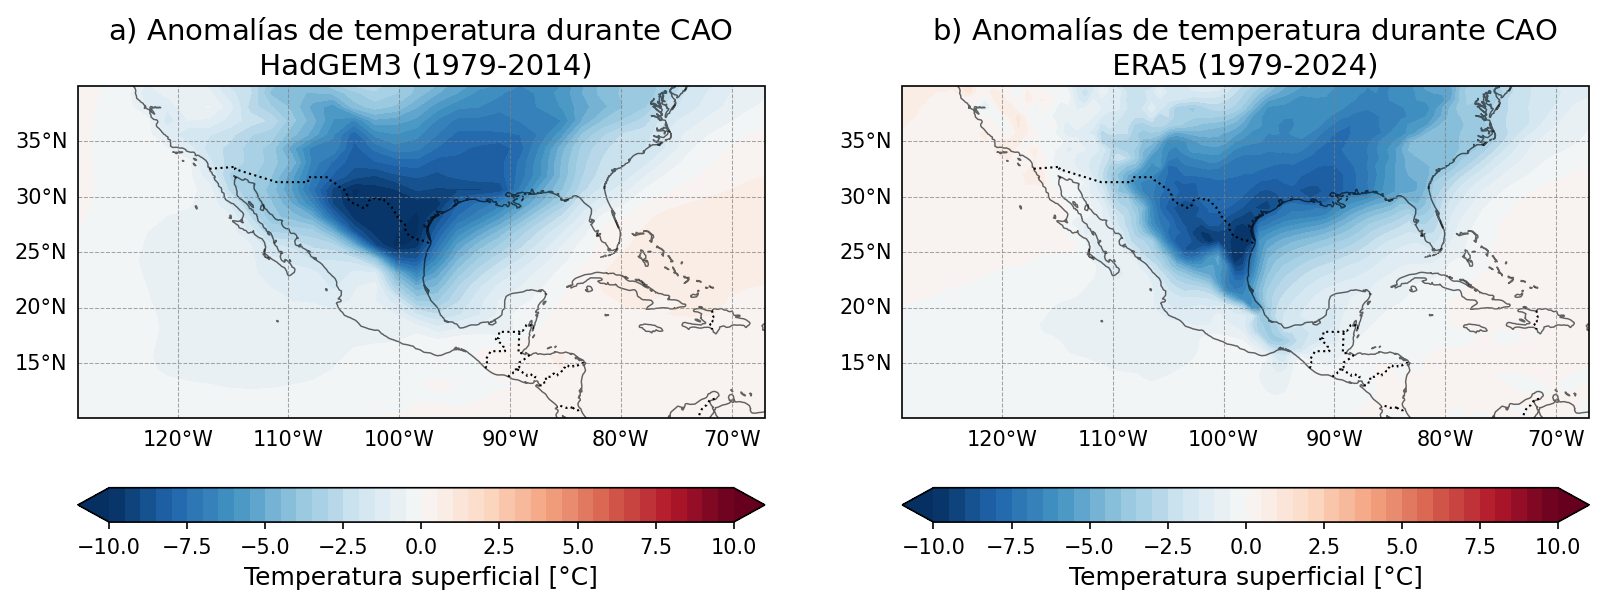

In [53]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})


# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[0]
# ax.coastlines()
# cs = ax.contourf(TanomaliaHG.lon, TanomaliaHG.lat, TanomaliaHG, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('a$)$ Método 2 - HadGEM3', fontsize=12)

# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[1]
# ax.coastlines()
# cs = ax.contourf(TanomaliaE5.longitude, TanomaliaE5.latitude, TanomaliaE5, levels=np.arange(-10, 10.1, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
# ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=10)
# ax.set_title('b$)$ Método 2 - ERA5', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax1 = axes[0]
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs = ax1.contourf(tempsHGday.lon, tempsHGday.lat, tempsHGday, levels=np.arange(-10, 10.1, 0.5), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09,pad=0.1, ax=ax1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=12)
ax1.set_title('a$)$ Anomalías de temperatura durante CAO \n HadGEM3 (1979-2014)', fontsize=14)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax2 = axes[1]
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs = ax2.contourf(tempsE5day.longitude, tempsE5day.latitude, tempsE5day, levels=np.arange(-10, 10.1, 0.5), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09,pad=0.1, ax=ax2)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=12)
ax2.set_title('b$)$ Anomalías de temperatura durante CAO \n ERA5 (1979-2024) ', fontsize=14)

plt.savefig('figsok/7_metodosCAO')

----
## **<font color="crimson"> Ya ok </font>**

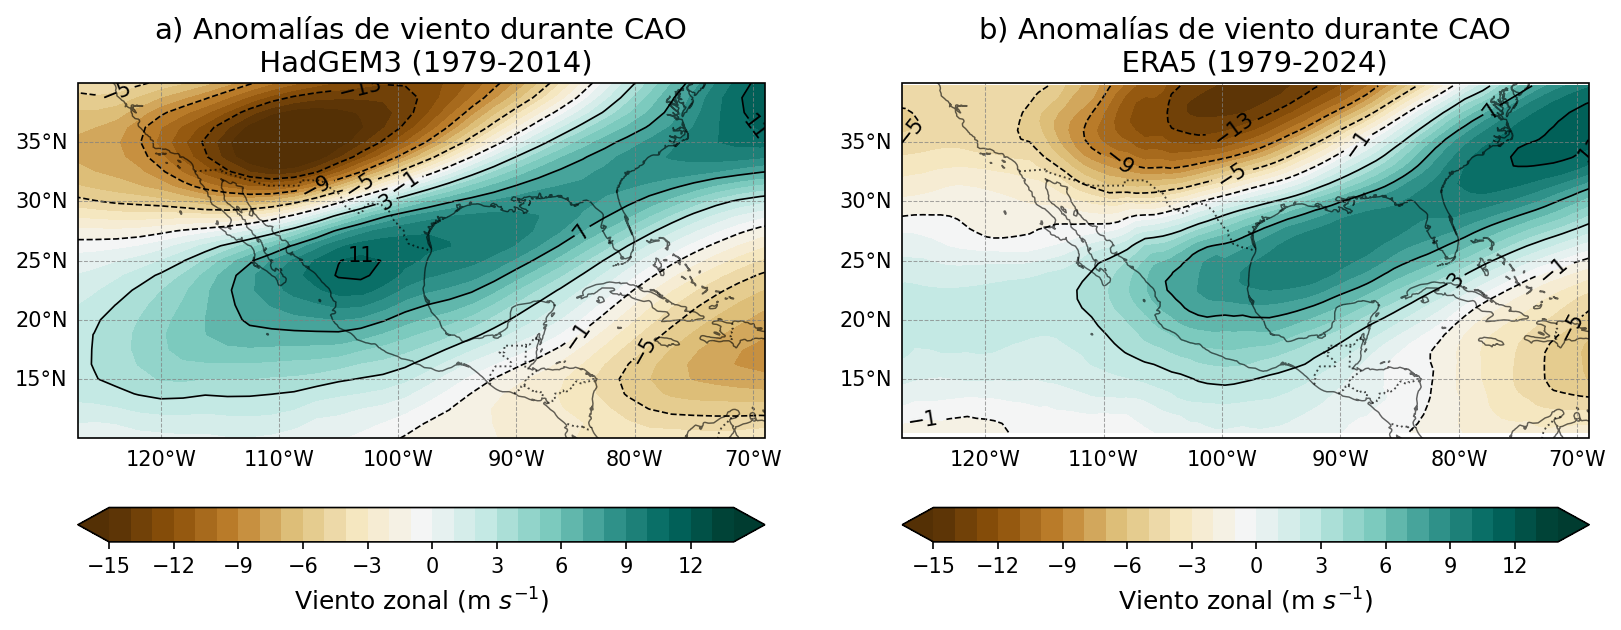

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})

# MÉTODO 1: SIN CICLO ANUAL HG ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[0]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(VanomaliaHG.lon, VanomaliaHG.lat, VanomaliaHG, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
# cc=ax.contour(VanomaliaHG.lon, VanomaliaHG.lat, VanomaliaHG, levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# ax.clabel(cc, cc.levels, inline=True, fontsize=10)
# ax.coastlines(linewidth=0.7,alpha=0.6)
# ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
# ax.set_title('a$)$ Método 2 - HadGEM3', fontsize=12)


# MÉTODO 1: SIN CICLO ANUAL E5 ( YA OK ) -------------------------------------------------------------------------------------------
# ax = axs[1]
# ax.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax.contourf(VanomaliaE5.longitude, VanomaliaE5.latitude, VanomaliaE5, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
# cc=ax.contour(VanomaliaE5.longitude, VanomaliaE5.latitude, VanomaliaE5, levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# ax.clabel(cc, cc.levels, inline=True, fontsize=10)
# ax.coastlines(linewidth=0.7,alpha=0.6)
# ax.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax, pad=0.1)
# cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
# ax.set_title('b$)$ Método 2 - ERA5', fontsize=12)

# MÉTODO 2: CICLO ANUAL HG  -------------------------------------------------------------------------------------------
ax1 = axes[0]
ax1.coastlines(linewidth=0.7,alpha=0.6)
cs = ax1.contourf(usHGday.lon, usHGday.lat, usHGday, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax1.contour(usHGday.lon, usHGday.lat, usHGday, levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=12)
ax1.set_title('a$)$ Anomalías de viento durante CAO \n HadGEM3 (1979-2014)', fontsize=14)

# MÉTODO 2: CICLO ANUAL E5 -------------------------------------------------------------------------------------------
ax2 = axes[1]
ax2.coastlines(linewidth=0.7,alpha=0.6)
cs = ax2.contourf(usE5day.longitude, usE5day.latitude, usE5day, levels=np.arange(-15, 15, 1), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
cc=ax2.contour(usE5day.longitude, usE5day.latitude, usE5day,levels=np.arange(-13, 13, 4),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax2.set_extent([233, 291, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=12)
ax2.set_title('b$)$ Anomalías de viento durante CAO \n  ERA5 (1979-2024)', fontsize=14)

plt.savefig('figsok/9_metodosCAOyviento')
